In [18]:
import sys
sys.path.append('..')
import itertools, copy
import json
import numpy as np
import scipy.misc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from lib import *
import clib

In [12]:
h = pd.read_csv('data/h.csv', index_col=0)
Jk = pd.read_csv('data/Jk.csv', index_col=0)

In [37]:
q = len(aminoacids)
N = 9
jump = lambda x: np.random.randint(q, size=N)
x0 = jump(0)
samples = mcmcsampler(x0, lambda x: clib.energy(x, np.asarray(h).flatten(), np.asarray(Jk).reshape(3, q, q)), jump, 1e6)

In [38]:
samples = [''.join(map_numbertoaa(s)) for s in samples]

In [42]:
df0 = counter_to_df(count_kmers_proteome(human, 1))
df0 = df0.set_index('seq')

4.200506351760171

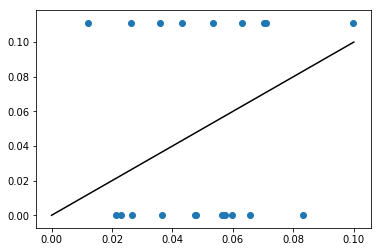

In [43]:
dfm0 = df0.merge(counter_to_df(count_kmers_iterable(samples, 1)), left_index=True, right_on='seq')
x = np.linspace(0.0, 0.1)
plt.plot(x, x, 'k')
plt.scatter(dfm0['freq_x'], dfm0['freq_y'])
dfm0['logfold'] = np.log(dfm0['freq_x']/dfm0['freq_y'])
np.abs(dfm0['logfold']).mean()

In [49]:
df0

,freq
seq,
M,0.021328
G,0.065778
A,0.070127
P,0.063148
L,0.099708
S,0.083325
W,0.012173
R,0.056436
V,0.059638
